In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [82]:
df = pd.read_csv('car details v4.csv')

In [83]:
df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


In [85]:
print(df.head())  # Muestra las primeras filas del dataframe


            Make                            Model    Price  Year  Kilometer  \
0          Honda              Amaze 1.2 VX i-VTEC   505000  2017      87150   
1  Maruti Suzuki                  Swift DZire VDI   450000  2014      75000   
2        Hyundai             i10 Magna 1.2 Kappa2   220000  2011      67000   
3         Toyota                         Glanza G   799000  2019      37500   
4         Toyota  Innova 2.4 VX 7 STR [2016-2020]  1950000  2018      69000   

  Fuel Type Transmission   Location   Color   Owner Seller Type   Engine  \
0    Petrol       Manual       Pune    Grey   First   Corporate  1198 cc   
1    Diesel       Manual   Ludhiana   White  Second  Individual  1248 cc   
2    Petrol       Manual    Lucknow  Maroon   First  Individual  1197 cc   
3    Petrol       Manual  Mangalore     Red   First  Individual  1197 cc   
4    Diesel       Manual     Mumbai    Grey   First  Individual  2393 cc   

            Max Power              Max Torque Drivetrain  Length   W

In [86]:
print(df.describe())  # Proporciona estadísticas descriptivas de las variables numéricas

              Price         Year     Kilometer       Length        Width  \
count  2.059000e+03  2059.000000  2.059000e+03  1995.000000  1995.000000   
mean   1.702992e+06  2016.425449  5.422471e+04  4280.860652  1767.991980   
std    2.419881e+06     3.363564  5.736172e+04   442.458507   135.265825   
min    4.900000e+04  1988.000000  0.000000e+00  3099.000000  1475.000000   
25%    4.849990e+05  2014.000000  2.900000e+04  3985.000000  1695.000000   
50%    8.250000e+05  2017.000000  5.000000e+04  4370.000000  1770.000000   
75%    1.925000e+06  2019.000000  7.200000e+04  4629.000000  1831.500000   
max    3.500000e+07  2022.000000  2.000000e+06  5569.000000  2220.000000   

            Height  Seating Capacity  Fuel Tank Capacity  
count  1995.000000       1995.000000         1946.000000  
mean   1591.735338          5.306266           52.002210  
std     136.073956          0.822170           15.110198  
min    1165.000000          2.000000           15.000000  
25%    1485.000000  

In [87]:
print(df.isnull().sum())  # Verificar los valores faltantes en cada columna

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64


In [89]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

In [90]:
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

In [91]:
print(df.isnull().sum())

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                  0
Width                   0
Height                  0
Seating Capacity        0
Fuel Tank Capacity      0
dtype: int64


In [92]:
# Eliminar las variables con valores faltantes
df_cleaned = df.drop(['Engine', 'Max Power', 'Max Torque', 'Drivetrain'], axis=1)


In [93]:
print(df_cleaned.isnull().sum())

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64


In [95]:
print(df.columns)

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')


In [131]:
X = df[['Year',]]  
y = df['Price']

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [136]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)


In [137]:
r2 = r2_score(y_test, y_pred)

In [138]:
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 6307457236542.078
R^2 Score: 0.09716540704166998


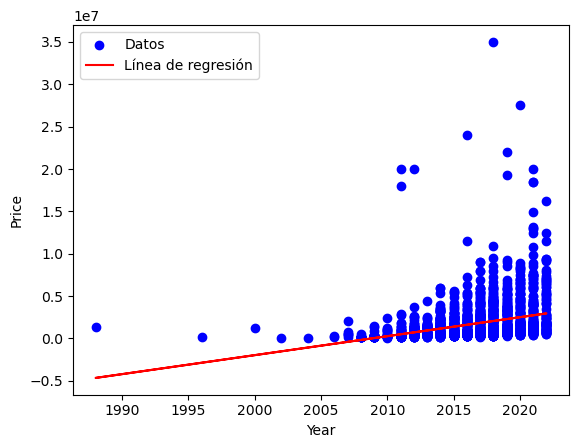

In [142]:
X = df[['Year']]
y = df['Price']

# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Predecimos los valores de y para los datos de X
y_pred = modelo.predict(X)

# Graficar los puntos de datos
plt.scatter(X, y, color='blue', label='Datos')

# Graficar la línea de regresión
plt.plot(X, y_pred, color='red', label='Línea de regresión')

# Establecer las etiquetas de los ejes
plt.xlabel('Year')
plt.ylabel('Price')

# Mostrar la leyenda del gráfico
plt.legend()

# Función para mostrar el gráfico
plt.show()